# What is the most optimal skill to learn as a Data Analyst?

### Methodology

1. Group skills based on median salary and likelihood of being in a job posting
2. Visualise the data
3. Determine if certain type of technologies are more profitable than others

### Librairies import and data cleanup 

In [26]:
# Load librairies

import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Load data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Clean data
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Calculations

In [27]:
# create data frame for data analysts in the US

df_DA_US = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()

In [28]:
# drop postings without salary info

df_DA_US = df_DA_US.dropna(subset=["salary_year_avg"])

df_DA_US_exploded = df_DA_US.explode("job_skills")

In [29]:
# group by skill and median salary

df_DA_skills = df_DA_US_exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"]).sort_values(by="count", ascending=False)

# rename columns for clarity
df_DA_skills = df_DA_skills.rename(columns={"count": "skill_count", "median": "median_salary"})

df_DA_skills

,skill_count,median_salary
job_skills,,
sql,2508,91000.0
excel,1808,84392.0
python,1431,97500.0
tableau,1364,92875.0
sas,926,90000.0
...,...,...
couchbase,1,160515.0
chainer,1,100000.0
chef,1,85000.0


In [30]:
# get the length of df_DA_US to be able to calculate the % of postings demanding said skill

DA_job_count = len(df_DA_US)

DA_job_count

4350

In [31]:
# add new column in the dataframe

df_DA_skills["skill_percent"] = df_DA_skills["skill_count"] / DA_job_count * 100

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
couchbase,1,160515.0,0.022989
chainer,1,100000.0,0.022989
chef,1,85000.0,0.022989


In [33]:
# define a % cut off and updating the df

skill_percent = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills["skill_percent"] > skill_percent]

df_DA_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.00,57.655172
excel,1808,84392.00,41.563218
python,1431,97500.00,32.896552
tableau,1364,92875.00,31.356322
sas,926,90000.00,21.287356
r,893,92500.00,20.528736
power bi,838,90000.00,19.264368
powerpoint,462,85000.00,10.620690
word,461,81194.75,10.597701


### Plotting

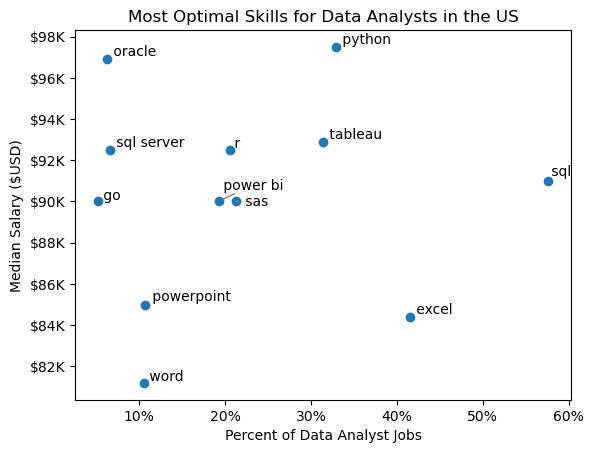

In [39]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [46]:
# color the various dots on the chart based on the type of technology the skills are related to

df_technology = df['job_type_skills'].copy()

# remove duplicates
df_technology = df_technology.drop_duplicates()

# remove NaN values
df_technology = df_technology.dropna()

# combine all dictionaries into one

technology_dict = {}
for row in df_technology:
    row_dict = ast.literal_eval(row)
    for key, value in row_dict.items():
        if key in technology_dict:
            technology_dict[key] += value
        else:
            technology_dict[key] = value


# remove duplicates by converting values to set then back to list
for key, value in technology_dict.items():
    technology_dict[key] = list(set(value))

technology_dict


{'analyst_tools': ['power bi',
  'looker',
  'ms access',
  'splunk',
  'msaccess',
  'sap',
  'alteryx',
  'sheets',
  'spss',
  'sharepoint',
  'dax',
  'nuix',
  'datarobot',
  'word',
  'qlik',
  'visio',
  'esquisse',
  'sas',
  'tableau',
  'outlook',
  'cognos',
  'ssis',
  'microstrategy',
  'excel',
  'spreadsheet',
  'powerbi',
  'ssrs',
  'powerpoint'],
 'programming': ['swift',
  'elixir',
  'erlang',
  'matlab',
  'java',
  'powershell',
  'vba',
  'python',
  'cobol',
  'scala',
  'sass',
  'mongo',
  'r',
  'ruby',
  'javascript',
  'visual basic',
  'pascal',
  'clojure',
  'c',
  'haskell',
  'visualbasic',
  'crystal',
  'lua',
  'solidity',
  't-sql',
  'mongodb',
  'nosql',
  'sas',
  'c++',
  'kotlin',
  'groovy',
  'php',
  'go',
  'c#',
  'golang',
  'sql',
  'ocaml',
  'delphi',
  'apl',
  'assembly',
  'f#',
  'julia',
  'fortran',
  'bash',
  'objective-c',
  'vb.net',
  'rust',
  'perl',
  'html',
  'typescript',
  'lisp',
  'css',
  'dart',
  'shell',
  'no-

In [48]:
# turn the list in a dataframe

df_technology = pd.DataFrame(list(technology_dict.items()), columns=["technology", "skills"])

# explode the dataframe

df_technology = df_technology.explode("skills")

df_technology

,technology,skills
0,analyst_tools,power bi
0,analyst_tools,looker
0,analyst_tools,ms access
0,analyst_tools,splunk
0,analyst_tools,msaccess
...,...,...
9,sync,webex
9,sync,google chat
9,sync,zoom
9,sync,rocketchat


In [49]:
# merge the dataframes together

df_DA_skills_tech_high_demand = df_DA_skills_high_demand.merge(df_technology, left_on="job_skills", right_on="skills")

df_DA_skills_tech_high_demand

,skill_count,median_salary,skill_percent,technology,skills
0,2508,91000.00,57.655172,programming,sql
1,1808,84392.00,41.563218,analyst_tools,excel
2,1431,97500.00,32.896552,programming,python
3,1364,92875.00,31.356322,analyst_tools,tableau
4,926,90000.00,21.287356,analyst_tools,sas
5,926,90000.00,21.287356,programming,sas
6,893,92500.00,20.528736,programming,r
7,838,90000.00,19.264368,analyst_tools,power bi
8,462,85000.00,10.620690,analyst_tools,powerpoint
9,461,81194.75,10.597701,analyst_tools,word


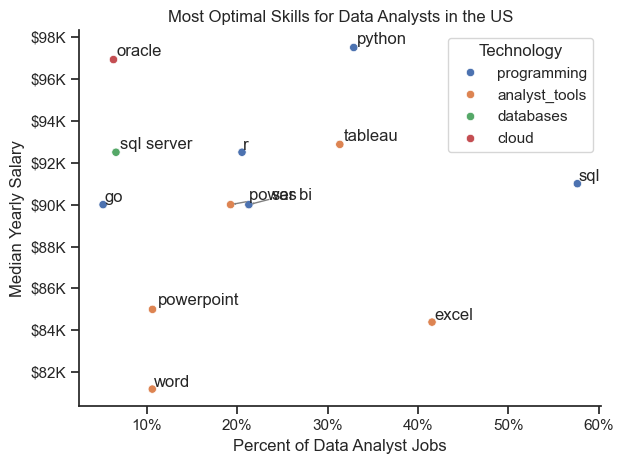

In [53]:
sns.scatterplot(
    data=df_DA_skills_tech_high_demand,
    x='skill_percent',
    y='median_salary',
    hue='technology'
)

sns.despine()
sns.set_theme(style='ticks')

# Set axis labels, title, and legend
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Yearly Salary')
plt.title('Most Optimal Skills for Data Analysts in the US')
plt.legend(title='Technology')

from matplotlib.ticker import PercentFormatter
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Adjust layout and display plot 
plt.tight_layout()
plt.show()